# Examen 3
## Física Computacional
## Integrantes:
### Carlos Sierra Evelin Ameyalli
$Amee \heartsuit Carlos$
### Hernández Ramos Sandra 
$Sandii\hbar ers^{\heartsuit}$ 🦆🌵🌹🥀🌿🍀🌺🌷



## Julia

In [15]:
using Plots
using DataFrames
using LaTeXStrings
using DifferentialEquations
using BenchmarkTools

ArgumentError: ArgumentError: Package DifferentialEquations not found in current path:
- Run `import Pkg; Pkg.add("DifferentialEquations")` to install the DifferentialEquations package.


## <span style="color:magenta">Plateamiento del problema<span>

Considera una partıcula de masa $m$ que se encuentra en el extremo de una vara de longitud $l$ de masa despreciable.
La partícula es libre de columpiarse en cualquier dirección bajo la acción de la gravedad. Como la partícula está
contrenida a moverse en la superficie de una esfera.

Tenemos el siguiente esquema

<img src="Problema 4 examen.png" width="400" height="400" alt="Esquema del problema planteado">  

Vemos que este sistema es el mismo de un péndulo esférico.

## <span style="color:magenta">Objetivo<span>

Analizar el problema del péndulo esférico con herramientas aprendidas a lo largo del curso de Física Computacional.

## <span style="color:magenta">Introducción del problema<span>

El péndulo esférico no es más que el movimiento de una partícula sobre una superficie esférica. De acuerdo al planteamiento del problema tenemos que la partícula de masa $m$ está sujeta a una vara de radio $l$ y masa despreciable. Para facilitarnos el trabajo vamos a usar coordenadas esféricas en la resolución del problema $(r,\phi,\theta)$

A continuación obtendremos las ecuaciones de movimiento y todo lo necesario para desarrollar la parte de programación.


## <span style="color:magenta">Desarrollo del problema<span>

Usando las coordenadas esféricas:

<img src="P4_2.png" width="400" height="400" alt="Esquema del problema planteado">  
Figura 2. Coordenadas esféricas en el problema

$x=rsen\theta cos\varphi$

$y=rsen\theta sen \varphi$

$z=rcos\theta$

Ahora si consideramos $\vec{r}$ como como la longitud de la vara $l$ podemos reescribir las ecuaciones anteriores como:

$x=lsen\theta cos\varphi$

$y=lsen\theta sen \varphi$

$z=lcos\theta$

Podemos obtener las velocidades de cada componente si derivamos con respecto al tiempo:

$\frac{dx}{dt}=l cos \theta \frac{d\theta}{dt}-lsen\theta sen \varphi\frac{d\varphi}{dt}$

$\frac{dy}{dt}=l cos \theta \frac{d\theta}{dt} sen \varphi + l sen \theta cos \varphi \frac{d\varphi}{dt}$

$\frac{dx}{dt}=-l sen \theta \frac{d\theta}{dt}$

Para poder obtener las ecuaciones de movimiento de la masa sostenida en el péndulo esférico, debemos obtener su lagrangiana. Recordemos que lagrangiana esta definida como la diferencia entre la energía cinetica y la energía potencial, es decir:
$$L=T-V$$
Entonces obtendremos la energía cinética $T$:
La energía cinética es: 
$$T=\frac{1}{2}mv^{2}$$
pero en este caso la velocidad $v$ la podemos expresar como una suma de sus componentes:
$$v^{2}=\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)^{2}+\left(\frac{dz}{dt}\right)^{2}$$
Ahora sustituyendo $v^{2}$ en $T$ obtenemos:
$$T=\frac{1}{2}m\left(\left(\frac{dx}{dt}\right)^{2}+\left(\frac{dy}{dt}\right)^{2}+\left(\frac{dz}{dt}\right)^{2}\right)$$

Ahora si sustituimos los valores de $\frac{dx}{dt}$,$\frac{dy}{dt}$ y $\frac{dz}{dt}$ en $T$ tenemos:
$$T=\frac{1}{2}m\left(\left(l cos \theta \frac{d\theta}{dt}-lsen\theta sen \varphi\frac{d\varphi}{dt}\right)^{2}+\left(l cos \theta \frac{d\theta}{dt} sen \varphi + l sen \theta cos \varphi \frac{d\varphi}{dt}\right)^{2}+\left(-l sen \theta \frac{d\theta}{dt}\right)^{2}\right)$$

por conveniencia $\dot{\theta}=\frac{d\theta}{dt}$ y $\dot{\varphi}=\frac{d\varphi}{dt}$

$$T=\frac{1}{2}m\left(\left(l cos \theta \dot{\theta}-lsen\theta sen \varphi\dot{\varphi}\right)^{2}+\left(l cos \theta \dot{\theta} sen \varphi + l sen \theta cos \varphi \dot{\varphi}\right)^{2}+\left(-l sen \theta \dot{\theta}\right)^{2}\right)$$

Desarrollando tenemos:
\begin{equation}
\begin{aligned}
T&=\frac{1}{2}m\left(\left(l cos\theta \dot{\theta}-l sen\theta sen\varphi\dot{\varphi}\right)^{2}+\left(l cos\theta \dot{\theta} sen\varphi + l sen\theta cos\varphi \dot{\varphi}\right)^{2}+\left(-l sen\theta \dot{\theta}\right)^{2}\right)\\
&=\frac{1}{2}m\left(l^{2}cos^{2}\theta\dot{\theta}^{2}cos^{2}\varphi+l^{2}sen^{2}\theta sen^{2} \varphi\dot{\varphi}^{2}-2l^{2}cos\theta sen\theta sen\varphi cos\varphi \dot{\theta} \dot{\varphi}+l^{2}cos^{2}\theta\dot{\theta}^{2} sen^{2}\varphi+l^{2} sen^{2}\theta cos^{2}\varphi \dot{\varphi}^{2}+2l^{2}cos\theta sen\theta sen\varphi cos\varphi \dot{\theta} \dot{\varphi}+l^{2}sen^{2}\theta \dot{\theta}\right)\\
&=\frac{1}{2}m\left(l^{2} cos^{2}\theta \dot{\theta}^{2} cos^{2}\varphi+l^{2}sen^{2}\theta sen^{2}\varphi \dot{\varphi}^{2} + l^{2} cos^{2}\theta + l^{2} cos^{2}\theta \dot{\theta}^{2} sen^{2}\varphi + l^{2} sen^{2}\theta cos^{2}\varphi \dot{\varphi}^{2} + l^{2} sen^{2}\theta \dot{\theta}^{2}\right)\\
&=\frac{1}{2}m l^{2}\left(cos^{2}\theta \dot{\theta}^{2} cos^{2}\varphi + sen^{2}\theta sen^{2}\varphi \dot{\varphi}^{2} + cos^{2}\theta \dot{\theta}^{2} sen^{2}\varphi + sen^{2}\theta cos^{2}\varphi \dot{\varphi}^{2} + sen^{2}\theta \dot{\theta}^{2} \right)\\
&=\frac{1}{2}m l^{2}\left(\dot{\theta}^{2}\left(cos^{2}\theta cos^{2}\varphi+cos^{2}\theta sen^{2}\varphi + sen^{2}\theta \right)+\dot{\varphi}^{2}\left(sen^{2}\theta sen^{2}\varphi + sen^{2}\theta cos^{2}\varphi\right)\right)\\
&=\frac{1}{2}m l^{2}\left(\dot{\theta}^{2}\left(cos^{2}\theta \left(cos^{2}\varphi + sen^{2}\varphi \right) + sen^{2}\theta \right)+\dot{\varphi}^{2}\left(sen^{2}\theta\left(sen^{2}\varphi + cos^{2}\varphi\right)\right)\right)\\
&=\frac{1}{2}m l^{2}\left(\dot{\theta}^{2}\left(cos^{2}\theta  + sen^{2}\theta \right)+\dot{\varphi}^{2}sen^{2}\theta\right)\\
&=\frac{1}{2}ml^{2}\left(\dot{\theta}^{2}+\dot{\varphi}^{2}sen^{2}\theta\right)
\end{aligned}
\end{equation}

Entonces tenemos a la energía cinética como:
$$T=\frac{1}{2}ml^{2}\left(\dot{\theta}^{2}+\dot{\varphi}^{2}sen^{2}\theta\right)$$


Ahora obtendremos la energía potencial $V$:
La energía potencial esta dada por $V=-mgz$ usando $z=l cos\theta$:
$$V=-mglcos\theta$$


Entonces la Lagrangia **$L=T-V$** la podemos reescribir sustituyendo $T$ y $V$ que ya obtuvimos:
$$L=\frac{1}{2}ml^{2}\left(\dot{\theta}^{2}+\dot{\varphi}^{2}sen^{2}\theta\right)+mglcos\theta$$

Apartir de la Lagrangiana podemos obtener las ecuaciones de movimiento:

La primer ecuación de movimiento es:
$$\frac{d}{dt}=\left(\frac{\partial L}{\partial \dot{\theta}}\right)-\frac{\partial L}{\partial \theta}=0$$
Sustituyendo y resolviendo tenemos:
$$
l\frac{d^{2}\theta}{dt^{2}}-l sen\theta cos\theta \left(\frac{d\varphi}{dt}\right)^{2}+g sen\theta=0\quad.....(1)
$$
    

Y la segunda ecuación de movimiento es:
$$\frac{d}{dt}=\left(\frac{\partial L}{\partial \dot{\varphi}}\right)-\frac{\partial L}{\partial \varphi}=0$$
Sustituyendo y resolviendo tenemos:
$$\frac{d}{dt}\left(m l^{2} sen^{2}\theta \frac{d\varphi}{d\theta}\right)=0 \quad.....(2)$$

De las ecuaciones (1) y (2) podemos empezar a definir nuestro sistema de ecuaciones para realizar una función

De la ecuación:

$\frac{d^2\theta}{dt^2}-(\frac{d\varphi}{dt})^2cos\theta\sin\theta+\frac{g}{l}sin\theta$

Veámosla como:

$\ddot{\theta}=\dot{\varphi}^2cos\theta sin\theta-\frac{g}{l}sin\theta$

Y de la ecuación:

$\frac{d^2\varphi}{dt^2}+2\frac{d\theta}{dt}\frac{d\varphi}{dt}cot\theta=0$

La reescribimos como:

$\ddot{\varphi}=-2\dot{\theta}\dot{\varphi}cot\theta$

Entonces obtenemos el siguiente sistema de ecuaciones:

$\frac{d}{dt}\dot{\theta}=\dot{\varphi}^2cos\theta sin\theta-\frac{g}{l}sin\theta$

$\frac{d}{dt}\dot{\varphi}=-2\dot{\theta}\dot{\varphi}cot\theta$

$\frac{d}{dt}\theta=\dot{\theta}$

$\frac{d}{dt}\varphi=\dot{\varphi}$


In [9]:
function raiz_bf(funcion,intervalo,error=1e-4)
    raiz = 0.5*(intervalo[1]+intervalo[2])
    iteracion = 0
    while abs(intervalo[2]-intervalo[1]) > error
        f_izq , f_med = funcion(intervalo[1]) , funcion(raiz)
        if f_izq*f_med < 0
            intervalo[2] = raiz
        else
            intervalo[1] = raiz
        end
        raiz = 0.5*(intervalo[1]+intervalo[2])
        iteracion += 1
    end
    return raiz,iteracion
end

raiz_bf (generic function with 2 methods)

In [11]:
function pendulo_esf(dx,x,p,t) 
    theta_d = x[1]
    phi_d = x[2]
    theta = x[3]
    phi = x[4]
    theta_dd = phi_d^2*cos(theta)*sin(theta)-g/l*sin(theta)
    phi_dd = -2*theta_d*phi_d/tan(theta)
    return [theta_d,phi_d,theta,phi,theta_dd,phi_dd]
end

pendulo_esf (generic function with 1 method)

In [5]:
function RK_2(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = sol[i,:] .+ 0.5*δ .*edo(sol[i,:],t[i])
        sol[i+1,:] .= sol[i,:] .+ δ*edo(k1,t[i]+0.5*δ)
    end
    return sol
end

RK_2 (generic function with 1 method)

In [6]:
function RK_4(edo,x_ini,t)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4 (generic function with 1 method)

In [16]:
plot(title="Espacio Fase",xlabel=L"\theta(t)",ylabel=L"v_{\theta}(t)")
tiempo = collect(0:0.05:5π)
th_ini_s = collect(0.1:0.25:π-0.1)
for th_ini in th_ini_s
    sol_num = RK_2(pendulo_esf,[th_ini,0],tiempo)
    plot!(sol_num[:,1],sol_num[:,2])
end
plot!(legend=false)

MethodError: MethodError: no method matching pendulo_esf(::Array{Float64,1}, ::Float64)
Closest candidates are:
  pendulo_esf(::Any, ::Any, !Matched::Any, !Matched::Any) at In[11]:2

In [9]:
p_ini = [1.0,0.0] # punto inicial 
t = (0.0,2π) # intervalo de integración
prob = ODEProblem(pendulo_esf,p_ini,t) # generacion del problema EDO
sol_DE = solve(prob) # generar la solucion del problema

sol_RK2 = RK_2(pendulo_esf,p_ini,tiempo)
sol_RK4 = RK_4(pendulo_esf,p_ini,tiempo);

UndefVarError: UndefVarError: ODEProblem not defined

In [21]:
plot(title="Comparación entre diferentes integradores",xlabel=L"\theta (t)",ylabel=L"v_{\theta}(t)")
plot!(sol_DE[1,:],sol_DE[2,:],label="DiffEq",lw=2)
plot!(sol_RK2[:,1],sol_RK2[:,2],label="RK 2",lw=2)
plot!(sol_RK4[:,1],sol_RK4[:,2],label="RK 4",lw=2)

UndefVarError: UndefVarError: sol_DE not defined

### <span style="color:green">Energía Potencial<span>

Como la lagrangiana $L$ no depende de $varphi$, de la segunda ecuación de movimiento obtenemos una cantidad $h$ que se conserva.
$$sen^{2}\theta \frac{d\varphi}{dt}=h \quad.....(2.1)$$

está cantidad esta relacionada con el componente en $z$ del momento angular $L$:
$$\vec{L}=\vec{r}\times m\vec{v}$$

$$L_{z}=m\left(x\frac{dy}{dt}-y\frac{dx}{dt}\right)=ml^{2}sen^{2}\theta\frac{d\varphi}{dt}$$

Ahora recordemos que la frecuencia está dada por:
$$\omega_{0}^{2}=\frac{g}{l}$$
usando esto podemos reescribir la ecuación (1) de movimiento como:
$$\frac{d^{2}\theta}{dt^{2}}-\frac{h^{2}}{sen^{3}\theta}cos\theta+\omega_{0}^{2}sen\theta=0\quad......(1.1)$$

Derivando esto también tenemos una cantidad que se conserva:
$$
\frac{d}{dt}\left(\frac{1}{2}\left(\frac{d\theta}{dt}\right)^{2}+\frac{h^{2}}{2sen^{2}\theta}-\omega_{0}^{2}cos\theta\right)=0
$$


La conservación de la energía $\varepsilon$ se escribe como:
$$
\frac{1}{2}\left(\frac{d\theta}{dt}\right)^{2}+\frac{h^{2}}{2sen^{2}\theta}-\omega_{0}^{2}cos\theta=\varepsilon
$$


Donde $V(\theta)$ es la energía potencial efectiva
$$
V(\theta)=\frac{h^{2}}{2sen^{2}\theta}-\omega_{0}^{2}cos\theta
$$

In [20]:
l=1
w_0=sqrt(9.8/l)
h2=21.1
V(theta)=(h2/(2*sin(theta)*sin(theta))) - w_0^2*cos(theta)

V (generic function with 1 method)

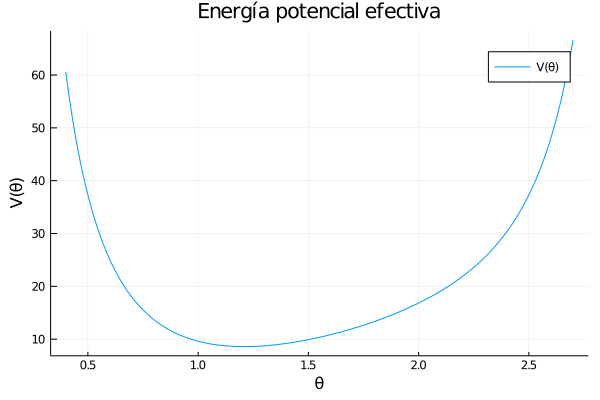

In [21]:
x = collect(0.4:0.0002:2.7)
#raiz = raiz_bf(V,[2.0,2.5])
#println("Valor de la raíz: ",raiz[1],"\t Número de iteraciones: ",raiz[2])
#raiz2 = raiz_bf(V,[0.4,0.55])
#println("Valor de la raíz: ",raiz2[1],"\t Número de iteraciones: ",raiz2[2])
plot(x,V,label="V(θ)",title="Energía potencial efectiva",xlabel="θ",ylabel="V(θ)")
#scatter!([raiz[1]],[37.7],label="raíz")
#scatter!([raiz2[1]],[37.7],label="raíz")

Recordando las ecuaciones (1.1) y (2.1)
$$
\frac{d^{2}\theta}{dt^{2}}-\frac{h^{2}}{sen^{3}\theta}cos\theta+\omega_{0}^{2}sen\theta=0$$

$$
sen^{2}\theta \frac{d\varphi}{dt}=h
$$

Si hacemos a $\varphi$ constante entonces tenemos que $

## <span style="color:magenta">Discusión y conclusión <span>

## <span style="color:magenta">Bibliografía<span>